In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data=pd.read_csv('uttarakhand_adhaar_data.csv')

In [3]:
data

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,15-03-2025,Uttarakhand,Haridwar,247667,17,15,28
1,03-09-2025,Uttarakhand,Chamoli,246427,2,0,0
2,03-09-2025,Uttarakhand,Dehradun,248008,5,0,0
3,03-09-2025,Uttarakhand,Dehradun,248009,2,0,0
4,03-09-2025,Uttarakhand,Dehradun,248121,1,0,0
...,...,...,...,...,...,...,...
11897,19-06-2025,Uttarakhand,Tehri Garhwal,249122,2,0,0
11898,19-06-2025,Uttarakhand,Tehri Garhwal,249130,1,0,0
11899,19-06-2025,Uttarakhand,Tehri Garhwal,249161,1,0,0
11900,19-06-2025,Uttarakhand,Tehri Garhwal,249181,4,1,0


In [4]:
data['district'].value_counts()

,count
district,
Dehradun,1801
Haridwar,1283
Pauri Garhwal,1180
Tehri Garhwal,1113
Almora,965
Udham Singh Nagar,938
Nainital,895
Pithoragarh,827
Chamoli,777


In [5]:
data['district']=data['district'].replace({'Hardwar':'Haridwar'})

In [6]:
data['district'].value_counts()

,count
district,
Dehradun,1801
Haridwar,1421
Pauri Garhwal,1180
Tehri Garhwal,1113
Almora,965
Udham Singh Nagar,938
Nainital,895
Pithoragarh,827
Chamoli,777


In [7]:
data['date']=pd.to_datetime(data['date'],format='%d-%m-%Y')

In [8]:
data['month']=data['date'].dt.month

In [9]:
data

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month
0,2025-03-15,Uttarakhand,Haridwar,247667,17,15,28,3
1,2025-09-03,Uttarakhand,Chamoli,246427,2,0,0,9
2,2025-09-03,Uttarakhand,Dehradun,248008,5,0,0,9
3,2025-09-03,Uttarakhand,Dehradun,248009,2,0,0,9
4,2025-09-03,Uttarakhand,Dehradun,248121,1,0,0,9
...,...,...,...,...,...,...,...,...
11897,2025-06-19,Uttarakhand,Tehri Garhwal,249122,2,0,0,6
11898,2025-06-19,Uttarakhand,Tehri Garhwal,249130,1,0,0,6
11899,2025-06-19,Uttarakhand,Tehri Garhwal,249161,1,0,0,6
11900,2025-06-19,Uttarakhand,Tehri Garhwal,249181,4,1,0,6


In [10]:
data.describe()

,date,pincode,age_0_5,age_5_17,age_18_greater,month
count,11902,11902.00000,11902.000000,11902.000000,11902.000000,11902.000000
mean,2025-10-11 18:17:28.966560,253061.22534,3.092589,0.565367,0.034616,9.404050
min,2025-03-15 00:00:00,244712.00000,0.000000,0.000000,0.000000,1.000000
25%,2025-09-12 00:00:00,247661.00000,1.000000,0.000000,0.000000,9.000000
50%,2025-10-24 00:00:00,249152.00000,1.000000,0.000000,0.000000,10.000000
75%,2025-11-15 00:00:00,262543.00000,3.000000,1.000000,0.000000,11.000000
max,2026-01-03 00:00:00,263680.00000,1298.000000,323.000000,54.000000,12.000000
std,NaN,7421.94516,15.728694,4.019119,0.797954,2.389547


In [11]:
data['total_enrolments']=pd.concat([data['age_0_5']+data['age_5_17']+data['age_18_greater']],axis=1)

In [12]:
data

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,month,total_enrolments
0,2025-03-15,Uttarakhand,Haridwar,247667,17,15,28,3,60
1,2025-09-03,Uttarakhand,Chamoli,246427,2,0,0,9,2
2,2025-09-03,Uttarakhand,Dehradun,248008,5,0,0,9,5
3,2025-09-03,Uttarakhand,Dehradun,248009,2,0,0,9,2
4,2025-09-03,Uttarakhand,Dehradun,248121,1,0,0,9,1
...,...,...,...,...,...,...,...,...,...
11897,2025-06-19,Uttarakhand,Tehri Garhwal,249122,2,0,0,6,2
11898,2025-06-19,Uttarakhand,Tehri Garhwal,249130,1,0,0,6,1
11899,2025-06-19,Uttarakhand,Tehri Garhwal,249161,1,0,0,6,1
11900,2025-06-19,Uttarakhand,Tehri Garhwal,249181,4,1,0,6,5


In [13]:
data=data.drop(['pincode','age_18_greater','age_0_5','age_5_17','date'],axis=1)

In [14]:
data

,state,district,month,total_enrolments
0,Uttarakhand,Haridwar,3,60
1,Uttarakhand,Chamoli,9,2
2,Uttarakhand,Dehradun,9,5
3,Uttarakhand,Dehradun,9,2
4,Uttarakhand,Dehradun,9,1
...,...,...,...,...
11897,Uttarakhand,Tehri Garhwal,6,2
11898,Uttarakhand,Tehri Garhwal,6,1
11899,Uttarakhand,Tehri Garhwal,6,1
11900,Uttarakhand,Tehri Garhwal,6,5


In [15]:
data.isnull().sum()

,0
state,0
district,0
month,0
total_enrolments,0


In [16]:
data_by_month=data.groupby('month')['total_enrolments'].sum().reset_index().replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
data_by_month

,month,total_enrolments
0,jan,1965
1,mar,311
2,apr,1276
3,may,624
4,jun,4462
5,jul,2363
6,sep,10956
7,oct,6804
8,nov,9165
9,dec,6023


Text(0, 0.5, 'Total Enrolments->')

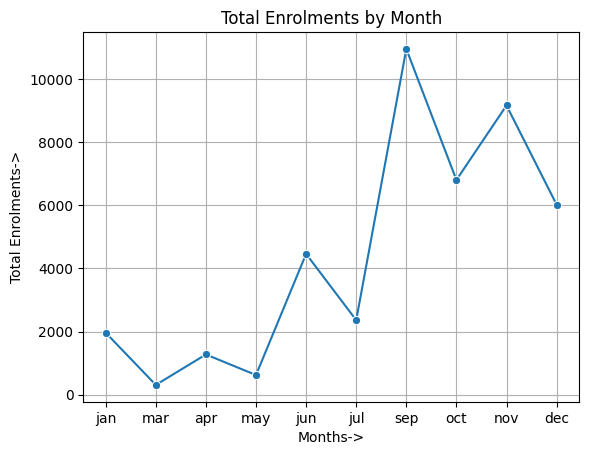

In [18]:
plot1=sns.lineplot(data=data_by_month,x='month',y='total_enrolments',marker='o')
plot1.grid(True)
plt.title("Total Enrolments by Month")
plt.xlabel("Months->")
plt.ylabel("Total Enrolments->")

In [19]:
data_by_district=data.groupby('district')['total_enrolments'].sum().reset_index().sort_values('total_enrolments',ascending=False)

In [20]:
data_by_district

,district,total_enrolments
4,Dehradun,10542
6,Haridwar,7264
12,Udham Singh Nagar,7069
7,Nainital,4524
11,Tehri Garhwal,3240
8,Pauri Garhwal,2213
0,Almora,1687
9,Pithoragarh,1528
13,Uttarkashi,1389
2,Chamoli,1355


Text(0, 0.5, 'Districts->')

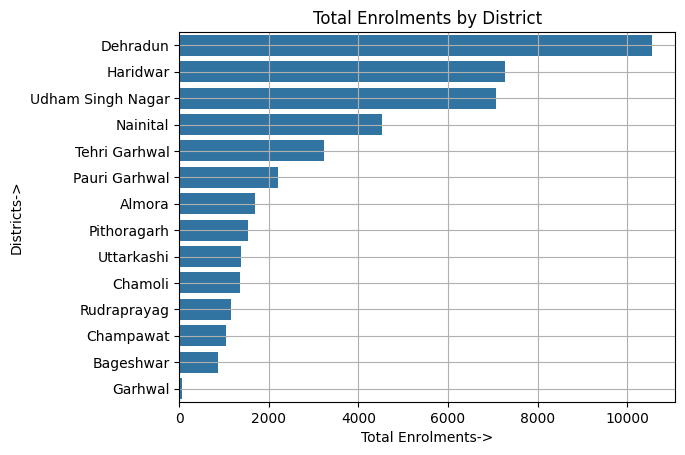

In [21]:
plot2=sns.barplot(data=data_by_district,x='total_enrolments',y='district',errorbar=None)
plot2.grid(True)
plt.title("Total Enrolments by District")
plt.xlabel("Total Enrolments->")
plt.ylabel("Districts->")

In [22]:
data_by_month_district=data.groupby(['month','district'])['total_enrolments'].sum().reset_index()

In [23]:
data_by_month_district

,month,district,total_enrolments
0,1,Almora,81
1,1,Bageshwar,41
2,1,Chamoli,53
3,1,Champawat,41
4,1,Dehradun,301
...,...,...,...
87,12,Pithoragarh,251
88,12,Rudraprayag,189
89,12,Tehri Garhwal,589
90,12,Udham Singh Nagar,1090


In [24]:
pivot_data_by_month_district=data_by_month_district.pivot(index='district',columns='month',values='total_enrolments')

In [25]:
pivot_data_by_month_district=pivot_data_by_month_district.fillna(0)

In [26]:
pivot_data_by_month_district

month,1,3,4,5,6,7,9,10,11,12
district,,,,,,,,,,
Almora,81.0,0.0,0.0,0.0,224.0,0.0,403.0,282.0,418.0,279.0
Bageshwar,41.0,0.0,0.0,0.0,91.0,0.0,241.0,146.0,242.0,117.0
Chamoli,53.0,0.0,0.0,0.0,224.0,0.0,373.0,213.0,268.0,224.0
Champawat,41.0,0.0,0.0,0.0,124.0,0.0,317.0,205.0,240.0,124.0
Dehradun,301.0,176.0,674.0,624.0,1074.0,1631.0,2221.0,1211.0,1656.0,974.0
Garhwal,3.0,0.0,0.0,0.0,3.0,0.0,19.0,22.0,12.0,4.0
Haridwar,406.0,60.0,0.0,0.0,659.0,732.0,1647.0,1192.0,1493.0,1075.0
Nainital,175.0,75.0,602.0,0.0,422.0,0.0,1029.0,763.0,983.0,475.0
Pauri Garhwal,87.0,0.0,0.0,0.0,266.0,0.0,611.0,445.0,462.0,342.0


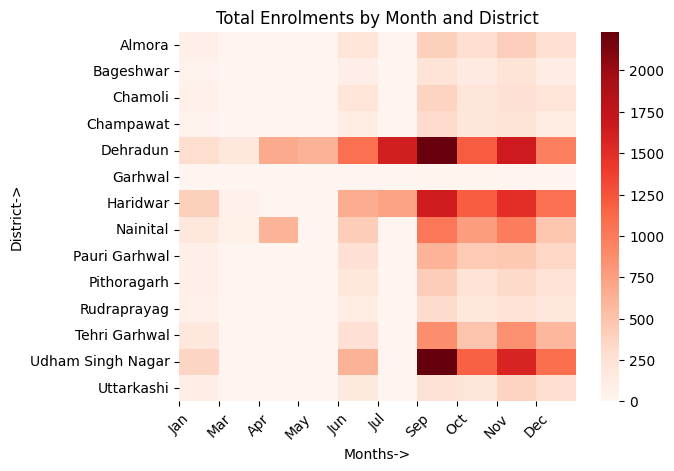

In [27]:
plot3=sns.heatmap(data=pivot_data_by_month_district,cmap='Reds')
plt.title("Total Enrolments by Month and District")
plt.xlabel("Months->")
plt.ylabel("District->")
data_cols=pivot_data_by_month_district.columns
plt.xticks(ticks=range(len(data_cols)),labels=['Jan','Mar','Apr','May','Jun','Jul','Sep','Oct','Nov','Dec'],rotation=45);

In [28]:
prediction_data=data.groupby('month')['total_enrolments'].sum().reset_index()

In [29]:
prediction_data

,month,total_enrolments
0,1,1965
1,3,311
2,4,1276
3,5,624
4,6,4462
5,7,2363
6,9,10956
7,10,6804
8,11,9165
9,12,6023


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(prediction_data['month'],prediction_data['total_enrolments'],test_size=0.2,random_state=42)

In [32]:
x_train

,month
5,7
0,1
7,10
2,4
9,12
4,6
3,5
6,9


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()

In [35]:
lr.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression()

In [36]:
y_pred=lr.predict(x_test.values.reshape(-1,1))

In [37]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [38]:
r2_score(y_test,y_pred)

0.8497393487577438

In [39]:
mean_absolute_error(y_test,y_pred)

1696.519999999999

In [40]:
mean_squared_error(y_test,y_pred)

2944857.6787999966

In [41]:
data_by_month_district

,month,district,total_enrolments
0,1,Almora,81
1,1,Bageshwar,41
2,1,Chamoli,53
3,1,Champawat,41
4,1,Dehradun,301
...,...,...,...
87,12,Pithoragarh,251
88,12,Rudraprayag,189
89,12,Tehri Garhwal,589
90,12,Udham Singh Nagar,1090


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(data_by_month_district[['month','district']],data_by_month_district['total_enrolments'],test_size=0.2,random_state=42)

In [44]:
x_train

,month,district
65,11,Bageshwar
15,3,Haridwar
68,11,Dehradun
78,12,Almora
30,6,Rudraprayag
...,...,...
20,6,Almora
60,10,Rudraprayag
71,11,Nainital
14,3,Dehradun


In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
ohe=OneHotEncoder(sparse_output=False,drop='first')

In [47]:
x_train_transformed=ohe.fit_transform(x_train[['district']])

In [48]:
x_train_transformed

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 

In [49]:
x_test_transformed=ohe.transform(x_test[['district']])

In [50]:
final_x_train=np.hstack([x_train['month'].values.reshape(-1,1),x_train_transformed])

In [51]:
final_x_train.shape

(73, 14)

In [52]:
final_x_test=np.hstack([x_test['month'].values.reshape(-1,1),x_test_transformed])

In [53]:
lr2=LinearRegression()

In [54]:
lr2.fit(x_train_transformed,y_train)

LinearRegression()

In [55]:
y_pred=lr2.predict(x_test_transformed)

In [56]:
r2_score(y_test,y_pred)

0.2573085040417321

In [57]:
mean_absolute_error(y_test,y_pred)

267.56566416040096

In [58]:
mean_squared_error(y_test,y_pred)

183943.75651867766